In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import re

The first part of this notebook (until the FDA section) is not used for the 'named_drugs.csv' output file, but the drug names in the list below might be useful later on, so I have left the section in.

In [2]:
drugs = ['Amantadine', 'Apomorphine', 
         'APO-go', 'Co-beneldopa', 
         'Madopar', 'Co-careldopa', 
         'Sinemet', 'Entacapone', 
         'Comtess', 'Pergolide', 
         'Rasagiline', 'Azilect', 
         'Selegiline', 'Zelapar', 
         'Tolcapone', 'Tasmar',
         'Levodopa', 'L-DOPA']

In [3]:
def load_data(filename):
    return pd.read_csv(filename,  
                       parse_dates = True)

In [4]:
# this dataframe was created with the 'queries.ipynb' script
park = load_data('parkinson_1960tonow.csv')

In [5]:
park.date = pd.to_datetime(park.date)

In [6]:
len(park)

7096

In [7]:
def named_drug(row):
    for d in drugs:
        if d.lower() in row.lower():
            return(d)        

In [8]:
park['named_drug'] = park.abstract.apply(named_drug)

In [9]:
park.named_drug.notnull().sum()

1551

In [10]:
park[park.named_drug.notnull()][:5]

,Unnamed: 0,published in,title,citations,date,authors,abstract,named_drug
6,6,The European journal of neuroscience,Repurposing an established drug: an emerging r...,NaN,2018-07-18,"Keila Bariotto-Dos-Santos, Fernando Eduardo Pa...",The nitric oxide (NO) system has been proven t...,L-DOPA
18,18,Current medical research and opinion,Developing consensus among movement disorder s...,NaN,2018-07-17,"Angelo Antonini, A Jon Stoessl, Leah S Kleinma...",Lack of a global consensus on definition of ad...,Levodopa
41,41,Journal of the neurological sciences,Toe dystonia in Parkinson's disease: Impact of...,NaN,2018-07-12,"Chloe Laurencin, Solveig Montaut, Christophe V...",Off state toe dystonia (TD) is a symptom frequ...,Levodopa
45,45,Clinical neuropharmacology,Postural Disorders and Antiparkinsonian Treatm...,NaN,2018-07-12,"Lucía Ameghino, Verónica Bruno, Marcelo Merello",The aim of this study was to evaluate the rela...,Amantadine
54,54,"Journal of neural transmission (Vienna, Austri...",Effects of histone acetyltransferase inhibitor...,NaN,2018-07-11,"Young-Kyoung Ryu, Hye-Yeon Park, Jun Go, Yong-...",Histone acetylation is a key regulatory factor...,L-DOPA


In [11]:
park.groupby(by = 'named_drug').count().abstract

named_drug
Amantadine       84
Apomorphine     168
Co-beneldopa      1
Entacapone       17
L-DOPA          442
Levodopa        651
Madopar          27
Pergolide        48
Rasagiline       10
Selegiline       48
Sinemet          50
Tolcapone         5
Name: abstract, dtype: int64

### FDA has a list of all approved drugs

In [12]:
fda_drugs = pd.read_table('Products.txt', usecols = ['Form', 'Strength','DrugName', 'ActiveIngredient'])

In [13]:
len(fda_drugs.ActiveIngredient.unique())

2709

In [14]:
fda_drugs.head()

,Form,Strength,DrugName,ActiveIngredient
0,SOLUTION/DROPS;OPHTHALMIC,1%,PAREDRINE,HYDROXYAMPHETAMINE HYDROBROMIDE
1,TABLET;ORAL,500MG,SULFAPYRIDINE,SULFAPYRIDINE
2,INJECTABLE;INJECTION,"20,000 UNITS/ML",LIQUAEMIN SODIUM,HEPARIN SODIUM
3,INJECTABLE;INJECTION,"40,000 UNITS/ML",LIQUAEMIN SODIUM,HEPARIN SODIUM
4,INJECTABLE;INJECTION,"5,000 UNITS/ML",LIQUAEMIN SODIUM,HEPARIN SODIUM


In [15]:
'NORDITROPIN' in fda_drugs.DrugName.values

True

In [16]:
fda_drugs.loc[fda_drugs.DrugName.str.contains('AMANTADINE')]

,Form,Strength,DrugName,ActiveIngredient
12550,CAPSULE;ORAL,100MG,AMANTADINE HYDROCHLORIDE,AMANTADINE HYDROCHLORIDE
13109,CAPSULE;ORAL,100MG,AMANTADINE HYDROCHLORIDE,AMANTADINE HYDROCHLORIDE
13165,CAPSULE;ORAL,100MG,AMANTADINE HYDROCHLORIDE,AMANTADINE HYDROCHLORIDE
13890,SYRUP;ORAL,50MG/5ML,AMANTADINE HYDROCHLORIDE,AMANTADINE HYDROCHLORIDE
14048,SYRUP;ORAL,50MG/5ML,AMANTADINE HYDROCHLORIDE,AMANTADINE HYDROCHLORIDE
14277,SYRUP;ORAL,50MG/5ML,AMANTADINE HYDROCHLORIDE,AMANTADINE HYDROCHLORIDE
14440,SYRUP;ORAL,50MG/5ML,AMANTADINE HYDROCHLORIDE,AMANTADINE HYDROCHLORIDE
14890,SYRUP;ORAL,50MG/5ML,AMANTADINE HYDROCHLORIDE,AMANTADINE HYDROCHLORIDE
15557,SYRUP;ORAL,50MG/5ML,AMANTADINE HYDROCHLORIDE,AMANTADINE HYDROCHLORIDE
16614,SYRUP;ORAL,50MG/5ML,AMANTADINE HYDROCHLORIDE,AMANTADINE HYDROCHLORIDE


The problem with this list is that many drugs and many active ingredients are multiple words. The whole string might not match in abstracts, but single words might match too often, if they are too common.  
Solution? 
* Remove common chemicals (hydrochloride, sodium etc), which ones?

In [17]:
fda_drug_names = set(fda_drugs.DrugName.values)

In [18]:
len(fda_drug_names)

7102

In [19]:
fda_act_ingr = set(fda_drugs.ActiveIngredient.values)

In [21]:
# this list contains words that should be ignored. More words can be added if necessary.
non_ingr = ['SODIUM', 'HYDROCHLORIDE',
           'ACETATE', 'POTASSIUM',
           'CALCIUM', 'AMINO', 'ACIDS',
           'ALCOHOL', 'GLYCINE',
           'CHLORIDE', 'SULFATE',
           'RECOMBINANT', 'PHOSPHATE',
           'DIHYDROCHLORIDE', 'DIPHOSPHATE',
           'DEXTROSE', 'MAGNESIUM',
           'OXYGEN']
fai = []
# use regex to split strings into single words
for item in list(fda_act_ingr):
    fai.append(' '.join([n for n in re.split('[\W]+', item) if n not in non_ingr]))

In [22]:
fai = set(fai) - {''}

In [23]:
def named_fda_drug(row):
    drugs = []
    for d in fai:
        if d in row.upper():
            drugs.append(d)
    if len(drugs) != 0: # don't return empty lists
        return drugs

In [24]:
park['named_fda_drug'] = park.abstract.apply(named_fda_drug)

In [25]:
park.named_fda_drug.notnull().sum()

3458

In [26]:
park.loc[park.named_fda_drug.notnull()][:5]

,Unnamed: 0,published in,title,citations,date,authors,abstract,named_drug,named_fda_drug
0,0,ACS chemical neuroscience,Mode-Selective Raman Imaging of Dopamine-Human...,NaN,2018-07-19,"Achut Prasad Silwal, H Peter Lu",Dopamine (DA) is the catecholamine neurotransm...,None,[DOPAMINE]
2,2,ACS chemical biology,Chemical Probe To Monitor the Parkinsonism-Ass...,NaN,2018-07-19,"Jonas Drechsel, Franziska A Mandl, Stephan A S...",Reactive oxygen species (ROS) play an importan...,None,[CYSTEINE]
6,6,The European journal of neuroscience,Repurposing an established drug: an emerging r...,NaN,2018-07-18,"Keila Bariotto-Dos-Santos, Fernando Eduardo Pa...",The nitric oxide (NO) system has been proven t...,L-DOPA,"[DOPAMINE, NITRIC OXIDE, METHYLENE BLUE]"
8,8,Medicine,Gastrointestinal nervous system α-synuclein as...,NaN,2018-07-18,"Fudong Yan, Ying Chen, Min Li, Yingqing Wang, ...",Lewy bodies (LB) play an essential role in the...,None,[DOPAMINE]
9,9,Cellular physiology and biochemistry : interna...,Fibroblast Growth Factor 9 Suppresses Striatal...,NaN,2018-07-18,"Issa Olakunle Yusuf, Pei-Hsun Cheng, Hsiu-Mei ...",Huntington's disease (HD) is a heritable neuro...,None,[IODIDE]
18,18,Current medical research and opinion,Developing consensus among movement disorder s...,NaN,2018-07-17,"Angelo Antonini, A Jon Stoessl, Leah S Kleinma...",Lack of a global consensus on definition of ad...,Levodopa,"[LEVODOPA, CARBIDOPA]"
20,20,Acta neurologica Belgica,The moral brain and moral behaviour in patient...,NaN,2018-07-16,"Patrick Santens, Giel Vanschoenbeek, Marijke M...",Morality is a complex and versatile concept th...,None,[DOPAMINE]
24,24,Scientific reports,"Post-treatment with PT302, a long-acting Exend...","Acta Neurol Scand. 2017 Dec;136(6):732-736, Ar...",2018-07-16,"Shuchun Chen, Seong-Jin Yu, Yazhou Li, Daniela...",We previously demonstrated that pretreatment w...,None,"[DOPAMINE, METHAMPHETAMINE, GLUCAGON, AMPHETAM..."
29,29,Neurotoxicity research,Nicotine-Induced Neuroprotection in Rotenone I...,NaN,2018-07-13,"Camila Mouhape, Gustavo Costa, Margot Ferreira...",Parkinson's disease (PD) is characterized by t...,None,"[DOPAMINE, MECAMYLAMINE, NICOTINE, ACETYLCHOLINE]"
31,31,Biochemical and biophysical research communica...,Salusin-β mediate neuroprotective effects for ...,NaN,2018-07-13,"Yujung Chang, Junsang Yoo, Hongwon Kim, Hi-Joo...","Neuropeptides, small peptides found in many ma...",None,[DOPAMINE]


In [27]:
"""
Many abstracts will contain multiple hits from the drug list. 
This is how you get the counts of all named drugs in the whole dataframe.
"""
drug_counts = park.named_fda_drug.apply(lambda x: pd.Series(x).value_counts()).sum()

In [28]:
'LEVODOPA' in drug_counts

True

In [29]:
drug_counts_dict = defaultdict(dict)
for year in range(1969, 2018, 1):
    mask = (park.date > str(year))&(park.date < str(year+1))
    drug_counts = park.loc[mask]\
        .named_fda_drug.apply(lambda x: pd.Series(x).value_counts()).sum()
    drug_counts_dict[year] = drug_counts.sort_values(ascending = False)[:20]\
        .to_dict()

In [30]:
df_drug_counts = pd.DataFrame(drug_counts_dict).transpose()

In [44]:
df_drug_counts['year'] = df_drug_counts.index # dash likes values from columns, not from indexes

In [47]:
df_drug_counts.to_csv('dash_chris/named_drugs.csv')

#### The rest of the notebook is just some visualization tryouts

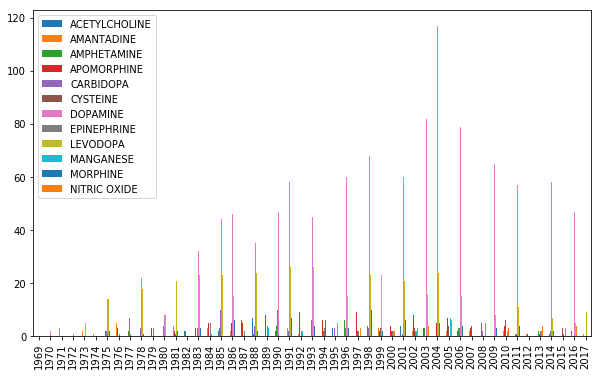

In [34]:
# keep only columns with more than # non-null rows
df_drug_counts.dropna(axis = 1, thresh = 20).plot(kind = 'bar',
                                                 figsize = (10,6))

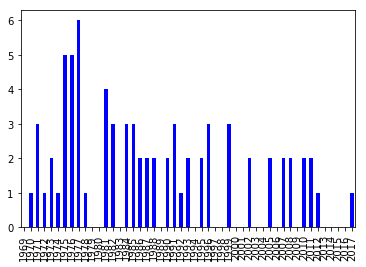

In [32]:
df_drug_counts.AMANTADINE.plot(kind = 'bar', color = 'b')

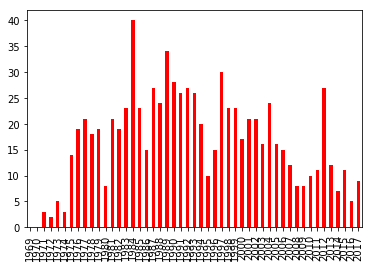

In [33]:
df_drug_counts.LEVODOPA.plot(kind = 'bar', color = 'r')